In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
m = 4
xs = np.random.randn(5,m)
ys = np.random.randint(2,size=(1,m))

In [5]:
xs.shape

(5, 4)

In [6]:
ys.shape

(1, 4)

In [9]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [12]:
# initialize the weights
hidden_dim = 6
W1 = np.random.randn(hidden_dim,5) * 0.01
B1 = np.zeros((hidden_dim,1)) 

W2 = np.random.randn(1,hidden_dim) * 0.01
B2 = np.zeros((1,1))

In [13]:
W1.shape

(6, 5)

In [14]:
W2.shape

(1, 6)

In [15]:
W2

array([[-0.01013385,  0.00888159,  0.00495258, -0.00212366, -0.00995394,
        -0.00219368]])

In [19]:
B2.shape

(1, 1)

In [67]:
# forward pass
Z1 = np.dot(W1,xs)+B1
A1 = np.tanh(Z1)

A2 = sigmoid(np.dot(W2,A1)+B2)

L = - (ys * np.log(A2) + (1-ys)*np.log(1-A2)) 
np.mean(L)

0.6868710682619814

In [42]:
A2

array([[0.50007345, 0.50011136, 0.50008264, 0.49999719]])

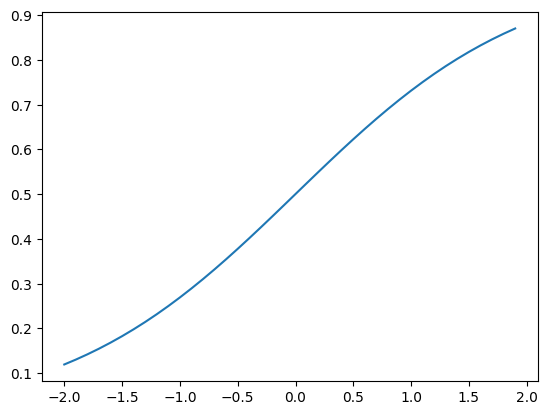

In [43]:
x = np.arange(-2,2,0.1)
y = sigmoid(x)
plt.plot(x,y)

In [44]:
# backward pass
dZ2 = A2 - ys

In [45]:
dZ2.shape

(1, 4)

In [46]:
dW2 = np.dot(dZ2,A1.T)

In [47]:
dW2.shape == W2.shape

True

In [55]:
dB2 = np.sum(dZ2,axis=1,keepdims=True) / m

In [56]:
dB2.shape

(1, 1)

In [57]:
dB2.shape == B2.shape

True

In [58]:
# dZ1 => dZ2 *  d`(Z2)/d`(Z1)  
dZ1 = np.dot(W2.T,dZ2) * (1 - Z1**2)

In [59]:
dZ1.shape

(6, 4)

In [60]:
# dW1 
dW1 = np.dot(dZ1,xs.T)

In [61]:
dW1.shape 

(6, 5)

In [62]:
dB1 = np.sum(dZ1,axis=1,keepdims=True) / m

In [63]:
dB1.shape

(6, 1)

In [66]:
# update the weights
l_r = 0.1
W2 = W2 - l_r * dW2
B2 = B2 - l_r * dB2
W1 = W1 - l_r * dW1
B1 = B1 - l_r * dB1 

In [70]:
# initialize the weights
hidden_dim = 6
W1 = np.random.randn(hidden_dim,5) * 0.01
B1 = np.zeros((hidden_dim,1)) 

W2 = np.random.randn(1,hidden_dim) * 0.01
B2 = np.zeros((1,1))

In [79]:
def forward_pass(w1,b1,w2,b2,x):
    return sigmoid(np.dot(W2,np.tanh(np.dot(w1,x)+b1))+B2)

def predict(w1,b1,w2,b2,x):
    a_s = forward_pass(w1,b1,w2,b2,x)
    
    return np.floor(a_s +0.5)

In [86]:
# training loop 
epoch = 1000

for e in range(epoch): 
    # forward pass
    Z1 = np.dot(W1,xs)+B1
    A1 = np.tanh(Z1)

    A2 = sigmoid(np.dot(W2,A1)+B2)

    L = - (ys * np.log(A2) + (1-ys)*np.log(1-A2)) 
    loss = np.mean(L)

    # backward pass
    dZ2 = A2 - ys
    d2W = np.dot(dZ2,A1.T) / m
    dB2 = np.sum(dZ2,axis=1,keepdims=True) / m
    dZ1 = np.dot(W2.T,dZ2) * (1 - Z1**2)
    dW1 = np.dot(dZ1,xs.T) / m 
    dB1 = np.sum(dZ1,axis=1,keepdims=True) / m
    
    # update the weights
    l_r = 0.1
    W2 = W2 - l_r * dW2
    B2 = B2 - l_r * dB2
    W1 = W1 - l_r * dW1
    B1 = B1 - l_r * dB1 
    
    if (e+1) % 10 == 0:
        print(loss)

0.02242374347666181
0.021083652996961407
0.019823766053599607
0.018639322217639073
0.01752583561178435
0.016479080306086084
0.015495076305593066
0.01457007613589895
0.013700552026218657
0.012883183684544457
0.012114846655393372
0.011392601247483347
0.0107136820162299
0.010075487784109098
0.009475572180595731
0.008911634682456612
0.008381512134601575
0.007883170731391763
0.007414698438236211
0.006974297833423449
0.006560279350401487
0.0061710549011015445
0.005805131861378323
0.005461107400186864
0.005137663134713791
0.004833560094318773
0.004547633976801615
0.004278790681187334
0.004026002101900937
0.003788302169885292
0.003564783126886055
0.0033545920197924606
0.0031569274025661674
0.002971036233922016
0.0027962109595327696
0.0026317867681186994
0.00247713901134877
0.0023316807780235853
0.002194860613530015
0.002066160376055314
0.0019450932215216029
0.0018312017096523078
0.0017240560240135603
0.0016232522992774836
0.001528411049343862
0.001439175690321242
0.001355211152714344
0.0012762

In [87]:
pred_y = predict(W1,B1,W2,B2,xs)
probs_y = forward_pass(W1,B1,W2,B2,xs)

In [88]:
pred_y == ys

array([[ True,  True,  True,  True]])

In [89]:
probs_y

array([[9.99883839e-01, 6.47599134e-06, 1.08046947e-04, 5.47340373e-06]])